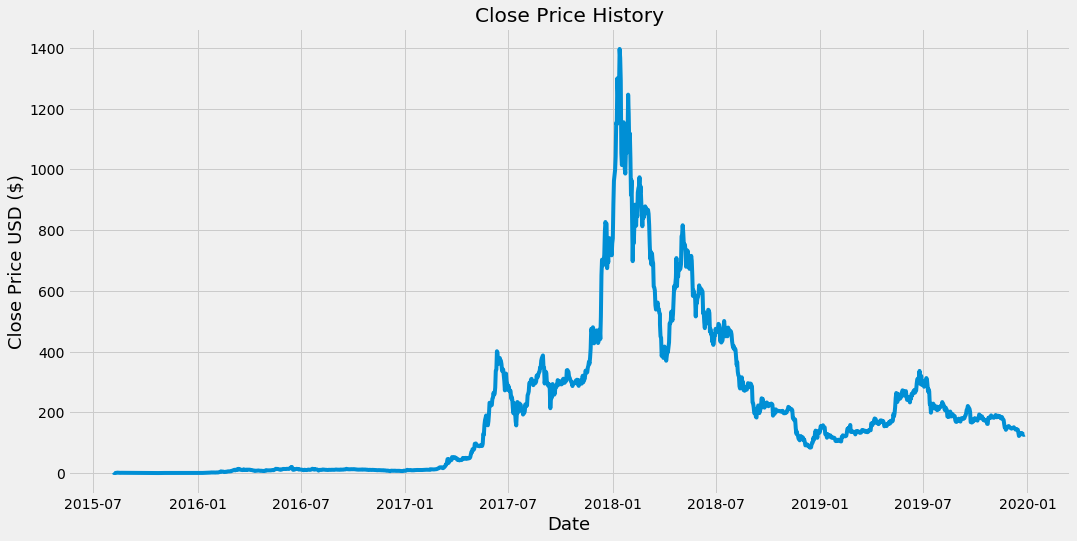

[array([0.00167429, 0.00022815, 0.00019131, 0.000196  , 0.00045347,
       0.00056062, 0.00099775, 0.00099789, 0.00089834, 0.00081032,
       0.00055071, 0.00046721, 0.00059029, 0.0007379 , 0.00068802,
       0.00067651, 0.00065743, 0.00057052, 0.00050528, 0.00051945,
       0.00051066, 0.00054195, 0.00053562, 0.00063356, 0.00066148,
       0.00065673, 0.00061602, 0.00059463, 0.00060143, 0.00064756,
       0.00061677, 0.00058154, 0.00057852, 0.00055279, 0.0005236 ,
       0.00039266, 0.00043261, 0.00035901, 0.00031576, 0.00036503,
       0.00033836, 0.00031476, 0.00030004, 0.00032061, 0.00036076,
       0.00034686, 0.00033451, 0.0003285 , 0.00027134, 0.0002159 ,
       0.00025153, 0.00020488, 0.00010606, 0.00016212, 0.00021763,
       0.00018294, 0.0001746 , 0.00018076, 0.0001673 , 0.00013884])]
[0.00015459764090231724]

[array([0.00167429, 0.00022815, 0.00019131, 0.000196  , 0.00045347,
       0.00056062, 0.00099775, 0.00099789, 0.00089834, 0.00081032,
       0.00055071, 0.00046721, 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


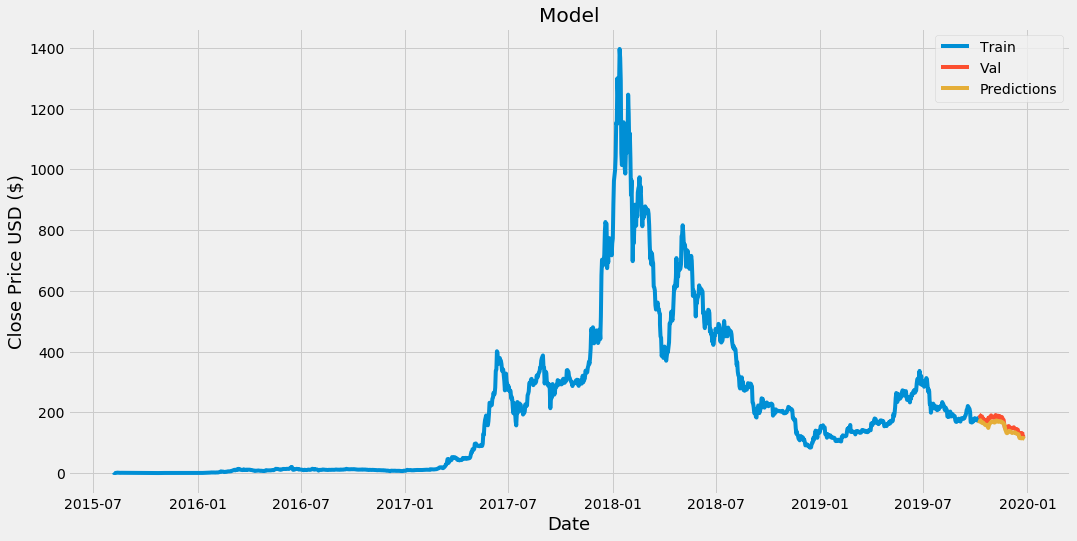

,Close,Predictions
Date,,
2019-10-08,193.293259,164.049728
2019-10-09,191.659668,170.779053
2019-10-10,182.569687,174.339951
2019-10-11,180.826645,171.275925
2019-10-12,182.075150,167.455856
...,...,...
2019-12-23,128.614090,116.362946
2019-12-24,129.063889,115.894348
2019-12-25,126.454636,115.371208


In [2]:

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Set the Ticker
ticker="ETH-USD"

#Get the stock quote
df = web.DataReader(ticker, data_source='yahoo', start='2010-01-01', end='2019-12-28')
#Show teh data
df

#Get the number of rows and columns in the data set
df.shape

#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .95 )

training_data_len
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0]) # 
  if i<= 61:
    print(x_train)
    print(y_train)
    print()
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


#Train the model
print(x_train)
print(y_train)
model.fit(x_train, y_train, batch_size=1, epochs=3)



#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])



#Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))



#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()




#Show the valid and predicted prices
valid





In [3]:
currentDate='2019-12-31'
#Get the quote
apple_quote = web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end=currentDate)
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
print(scaler.data_max_)

X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
X_calculated=[]


for i in range(5):
  
  #Convert the X_test data set to a numpy array
  print(i,". teszt:")
  #print(X_test)
  X_test = np.array(X_test)
  #Reshape the data
  
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  #Get the predicted scaled price
  pred_price = model.predict(X_test)
  #undo the scaling
  pred_price_scale = scaler.inverse_transform(pred_price)
  print("Predicted:",pred_price_scale)
  x=[]
  #print("előtte:",last_60_days)
  
  
  last_60_days=np.concatenate((last_60_days,np.array(pred_price_scale)))
  #last_60_days.concatenate(x)
  last_60_days=last_60_days[-60:]
  #print("utána:",last_60_days)
  X_test=[]
  last_60_days_scaled = scaler.transform(last_60_days)
  X_test.append(last_60_days_scaled)
  
#Get the quote
apple_quote2 = web.DataReader(ticker, data_source='yahoo', start='2019-12-18', end=currentDate)
print(apple_quote2['Close'])


[1396.42004395]
0 . teszt:
Predicted: [[114.8946]]
1 . teszt:
Predicted: [[108.783485]]
2 . teszt:
Predicted: [[101.04967]]
3 . teszt:
Predicted: [[93.059685]]
4 . teszt:
Predicted: [[85.18448]]
Date
2019-12-18    133.092194
2019-12-19    129.321136
2019-12-20    129.066055
2019-12-21    128.130951
2019-12-22    132.372513
2019-12-23    128.614090
2019-12-24    129.063889
2019-12-25    126.454636
2019-12-26    126.361221
2019-12-27    127.214607
2019-12-31    132.167389
Name: Close, dtype: float64
